# Financial Forecasting Prediction

## Exploratory Data Analysis and inference

In [28]:
from os import listdir, getcwd
from os.path import isfile, join, basename
import os
from zipfile import ZipFile
from typing import Awaitable
import asyncio
import numpy as np
import pandas as pd
import glob
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline
import  pickle
import warnings
def warn(*args, **kwargs):
    pass # Suppress warnings generated by your code
warnings.warn = warn
warnings.filterwarnings('ignore')

In [4]:
path = os.path.join(os.getcwd(), "cryptocurrency", "coins", "*.csv")
start_date = "2010-08-01"
end_date = "2022-11-15"

# Creating a date range DataFrame
date_range_df = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq="D"), columns=["Date"])

# Getting list of CSV files
csv_files = glob.glob(path)

# Processing each CSV file
dfs = []
for file in csv_files:
    df = pd.read_csv(file, usecols=["Date", "Close"])
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.rename(columns={"Close": basename(file).replace(".csv", "")})
    dfs.append(df)

# Merging all dataframes
cryptos = date_range_df.merge(dfs[0], on="Date", how="left")
for df in dfs[1:]:
    cryptos = cryptos.merge(df, on="Date", how="left")

# Sorting Date as index 
cryptos.set_index("Date", inplace=True)
cryptos.sort_index(inplace=True)


print('\n\t--------Features of crypto currency merged data by coin----------')
# Displaying the last 3 rows
cryptos.info()


	--------Features of crypto currency merged data by coin----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4490 entries, 2010-08-01 to 2022-11-15
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   usdc    1499 non-null   float64
 1   usdt    2876 non-null   float64
 2   eth     2657 non-null   float64
 3   ftx     1203 non-null   float64
 4   bnb     1917 non-null   float64
 5   doge    3257 non-null   float64
 6   btc     4490 non-null   float64
 7   xrp     3390 non-null   float64
dtypes: float64(8)
memory usage: 315.7 KB


In [5]:
path = os.path.join(os.getcwd(), "cryptocurrency", "interest_rate", "*.csv")
start_date = "2018-01-01"
end_date = "2022-11-15"

# Getting list of CSV files
csv_files = glob.glob(path)

# Reading and concatenating the CSV files
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df_list.append(df)
    else:
        print(f"Skipping file {file} as it does not contain a 'Date' column.")

# Concatenating all DataFrames
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Sorting the DataFrame by Date
    combined_df = combined_df.sort_values('Date')
    
    # Setting Date as index
    combined_df.set_index('Date', inplace=True)
    
    # Filtering by date range
    rates_df = combined_df.loc[start_date:end_date]
    
    # Displaying the last 3 rows
    print(rates_df.tail(3))
else:
    print("No valid CSV files found with a 'Date' column.")

# Printing the column names
print("\n-------- Rates  DataFrame info----------:")
print(rates_df.info())

            1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
Date                                                                      
2022-11-10  3.71  4.00  4.28  4.52  4.59  4.34  4.17  3.95  3.89   3.82   
2022-11-14  3.72  4.05  4.34  4.55  4.63  4.40  4.24  4.00  3.95   3.88   
2022-11-15  3.77  4.10  4.31  4.54  4.60  4.37  4.17  3.93  3.88   3.80   

            20 Yr  30 Yr  4 Mo  
Date                            
2022-11-10   4.24   4.03  4.36  
2022-11-14   4.28   4.07  4.38  
2022-11-15   4.20   3.98  4.40  

-------- Rates  DataFrame info----------:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1220 entries, 2018-01-01 to 2022-11-15
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1 Mo    1219 non-null   float64
 1   2 Mo    1021 non-null   float64
 2   3 Mo    1219 non-null   float64
 3   6 Mo    1219 non-null   float64
 4   1 Yr    1219 non-null   float64
 5   2 Yr    1219 non-null   flo

In [6]:
path = os.path.join(os.getcwd(), "cryptocurrency", "economic_index", "*.csv")
start_date = "2018-01-01"
end_date = "2022-11-15"

# Getting list of CSV files
csv_files = glob.glob(path)

# Read and concatenate the CSV files
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    if 'Date' in df.columns and 'Rate' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.rename(columns={'Rate': basename(file).replace(".csv", "")})
        df_list.append(df)
    else:
        print(f"Skipping file {file} as it does not contain required columns.")

# Concatenating all DataFrames
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Sort the DataFrame by Date
    combined_df = combined_df.sort_values('Date')
    
    # Set Date as index
    combined_df.set_index('Date', inplace=True)
    
    # Filter by date range
    mask = (combined_df.index >= start_date) & (combined_df.index <= end_date)
    economic_index_df = combined_df.loc[mask]
    
    # Display the last 3 rows
    print(economic_index_df.tail(3))
else:
    print("No valid CSV files found with the required columns.")

# Print the column names
print("\n----------Ecnomic Index DataFrame info-----------:")
economic_index_df.info()

            consumer-price-index  personal-saving-rate
Date                                                  
2022-09-01                   NaN                   3.1
2022-09-01               296.761                   NaN
2022-10-01               298.062                   NaN

----------Ecnomic Index DataFrame info-----------:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2018-01-01 to 2022-10-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumer-price-index  58 non-null     float64
 1   personal-saving-rate  57 non-null     float64
dtypes: float64(2)
memory usage: 2.7 KB


In [7]:
path = os.path.join(os.getcwd(), "cryptocurrency", "stock_index", "*.csv")
start_date = "2018-01-01"
end_date = "2022-11-15"

# Get list of CSV files
csv_files = glob.glob(path)

# Read and concatenate the CSV files
df_list = []
for file in csv_files:
    # Read the file to check columns
    temp_df = pd.read_csv(file, nrows=0)
    if "Date" in temp_df.columns and "Price" in temp_df.columns:
        df = pd.read_csv(file, usecols=["Date", "Price"])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.rename(columns={"Price": basename(file).replace(".csv", "")})
        df_list.append(df)
    else:
        print(f"Skipping file {file} as it does not contain required columns.")

# Concatenate all DataFrames
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Convert "Date" column to datetime and set as index
    combined_df["Date"] = pd.to_datetime(combined_df["Date"])
    combined_df.set_index("Date", inplace=True)
    
    # Sort the DataFrame by Date
    combined_df.sort_index(inplace=True)
    
    # Filter by date range
    mask = (combined_df.index >= start_date) & (combined_df.index <= end_date)
    stock_index = combined_df.loc[mask]
    
    # Display the last 3 rows
    print(stock_index.tail(3))
else:
    print("No valid CSV files found with the required columns.")

# Print the column names
print("\n----Stock index DataFrame-----:")
stock_index.info()

             s&p500    nasdaq
Date                         
2022-11-14      NaN  11196.22
2022-11-15      NaN  11358.41
2022-11-15  3991.73       NaN

----Stock index DataFrame-----:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2018-01-02 to 2022-11-15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s&p500  1228 non-null   float64
 1   nasdaq  1228 non-null   float64
dtypes: float64(2)
memory usage: 57.6 KB


In [8]:
path = os.path.join(os.getcwd(), "cryptocurrency", "metals", "*.csv")
start_date = "2018-01-01"
end_date = "2022-11-15"

# Get list of CSV files
csv_files = glob.glob(path)

# Read and concatenate the CSV files
df_list = []
for file in csv_files:
    # Read the file to check columns
    temp_df = pd.read_csv(file, nrows=0)  # Read only the header
    if "Date" in temp_df.columns and "Price" in temp_df.columns:
        df = pd.read_csv(file, usecols=["Date", "Price"])
        df["Date"] = pd.to_datetime(df["Date"])  # Convert 'Date' to datetime
        df = df.rename(columns={"Price": os.path.basename(file).replace(".csv", "")})  # Rename 'Price' column
        df_list.append(df)
    else:
        print(f"Skipping file {file} as it does not contain required columns.")

# Concatenate all DataFrames
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Set 'Date' as index
    combined_df.set_index("Date", inplace=True)
    
    # Sort the DataFrame by Date
    combined_df.sort_index(inplace=True)
    
    # Filter by date range
    mask = (combined_df.index >= start_date) & (combined_df.index <= end_date)
    metals = combined_df.loc[mask]
    
    # Display the last 3 rows
    print(metals.tail(3))
else:
    print("No valid CSV files found with the required columns.")

# Print the column names
print("\n----Metals DataFrame Info------:")
metals.info()
print('\n\t--------Metals Features----------')
print(metals.columns)

            silver     gold
Date                       
2022-11-14   21.97      NaN
2022-11-15     NaN  1778.25
2022-11-15   21.54      NaN

----Metals DataFrame Info------:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2539 entries, 2018-01-01 to 2022-11-15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   silver  1270 non-null   float64
 1   gold    1269 non-null   float64
dtypes: float64(2)
memory usage: 59.5 KB

	--------Metals Features----------
Index(['silver', 'gold'], dtype='object')


In [9]:

# Get the index of the first non-null value
first_non_null_index = cryptos.first_valid_index()
last_index = cryptos.index[-1]

# Display the first and last dates
print("The first date in this time series is:", first_non_null_index)
print("The last date in this time series is:", last_index)

# Step 2: Create the predictor_variables DataFrame
start_date = first_non_null_index
end_date = last_index

# Create a DataFrame with all dates in the specified range
predictor_variables = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq="D"), columns=["Date"])

# Step 3: Reset index for each DataFrame to avoid index conflicts
# Assuming that all DataFrames have a 'Date' column
economic_index_df.reset_index(drop=True, inplace=True)
stock_index.reset_index(drop=True, inplace=True)
metals.reset_index(drop=True, inplace=True)
rates_df.reset_index(drop=True, inplace=True)

# Step 4: Concatenate the economic_index, stock_index, metals, and rates DataFrames
# Make sure to align on the Date index
predictor_variables = pd.concat([predictor_variables, economic_index_df, stock_index, metals, rates_df], axis=1)

# Display the resulting DataFrame
print("\n----Predictor varibles DataFrame Info------:")
predictor_variables.info()
print('\n\t--------Predictor variables Features----------')
print(predictor_variables.columns)


The first date in this time series is: 2010-08-01 00:00:00
The last date in this time series is: 2022-11-15 00:00:00

----Predictor varibles DataFrame Info------:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4490 non-null   datetime64[ns]
 1   consumer-price-index  58 non-null     float64       
 2   personal-saving-rate  57 non-null     float64       
 3   s&p500                1228 non-null   float64       
 4   nasdaq                1228 non-null   float64       
 5   silver                1270 non-null   float64       
 6   gold                  1269 non-null   float64       
 7   1 Mo                  1219 non-null   float64       
 8   2 Mo                  1021 non-null   float64       
 9   3 Mo                  1219 non-null   float64       
 10  6 Mo                  1219 no

In [10]:
df1, df2 = cryptos.copy(), predictor_variables.copy()

# Find the first date in the 'cryptos' DataFrame
first_non_null_index = df1.first_valid_index()
start_date = first_non_null_index
end_date = df1.index[-1]  # Assuming you want the last date from cryptos

# Display the first and last dates
print("The first date in this time series is:", start_date)
print("The last date in this time series is:", end_date)

# Filter df1 to start from start_date
df1 = df1[start_date:]

# Ensure df2 has a DateTime index
df2["Date"] = pd.to_datetime(df2["Date"])  # Convert 'Date' to datetime if not already
df2.set_index("Date", inplace=True)  # Set 'Date' as the index

# Filter df2 to start from start_date
df2 = df2[start_date:]

# Drop the "4 Mo" column from df2 if it exists
if "4 Mo" in df2.columns:
    df2.drop(["4 Mo"], axis=1, inplace=True)

# Reindex df2 to fill missing dates and forward fill
df2 = df2.reindex(pd.date_range(start=start_date, end=end_date)).reset_index().rename(columns={"index": "Date"})
df2 = df2.groupby(df2["Date"].dt.time).ffill()
df2.set_index("Date", inplace=True)

# Assign the cleaned DataFrames to coins and factors
coins = df1
factors = df2

# Display the last 3 rows of each DataFrame
print("Coins DataFrame:")
coins.info()
print("\nFactors DataFrame:")
factors.info()

The first date in this time series is: 2010-08-01 00:00:00
The last date in this time series is: 2022-11-15 00:00:00
Coins DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4490 entries, 2010-08-01 to 2022-11-15
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   usdc    1499 non-null   float64
 1   usdt    2876 non-null   float64
 2   eth     2657 non-null   float64
 3   ftx     1203 non-null   float64
 4   bnb     1917 non-null   float64
 5   doge    3257 non-null   float64
 6   btc     4490 non-null   float64
 7   xrp     3390 non-null   float64
dtypes: float64(8)
memory usage: 315.7 KB

Factors DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4490 entries, 2010-08-01 to 2022-11-15
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumer-price-index  4489 non-null   float64
 1   personal-saving-rate  4490 

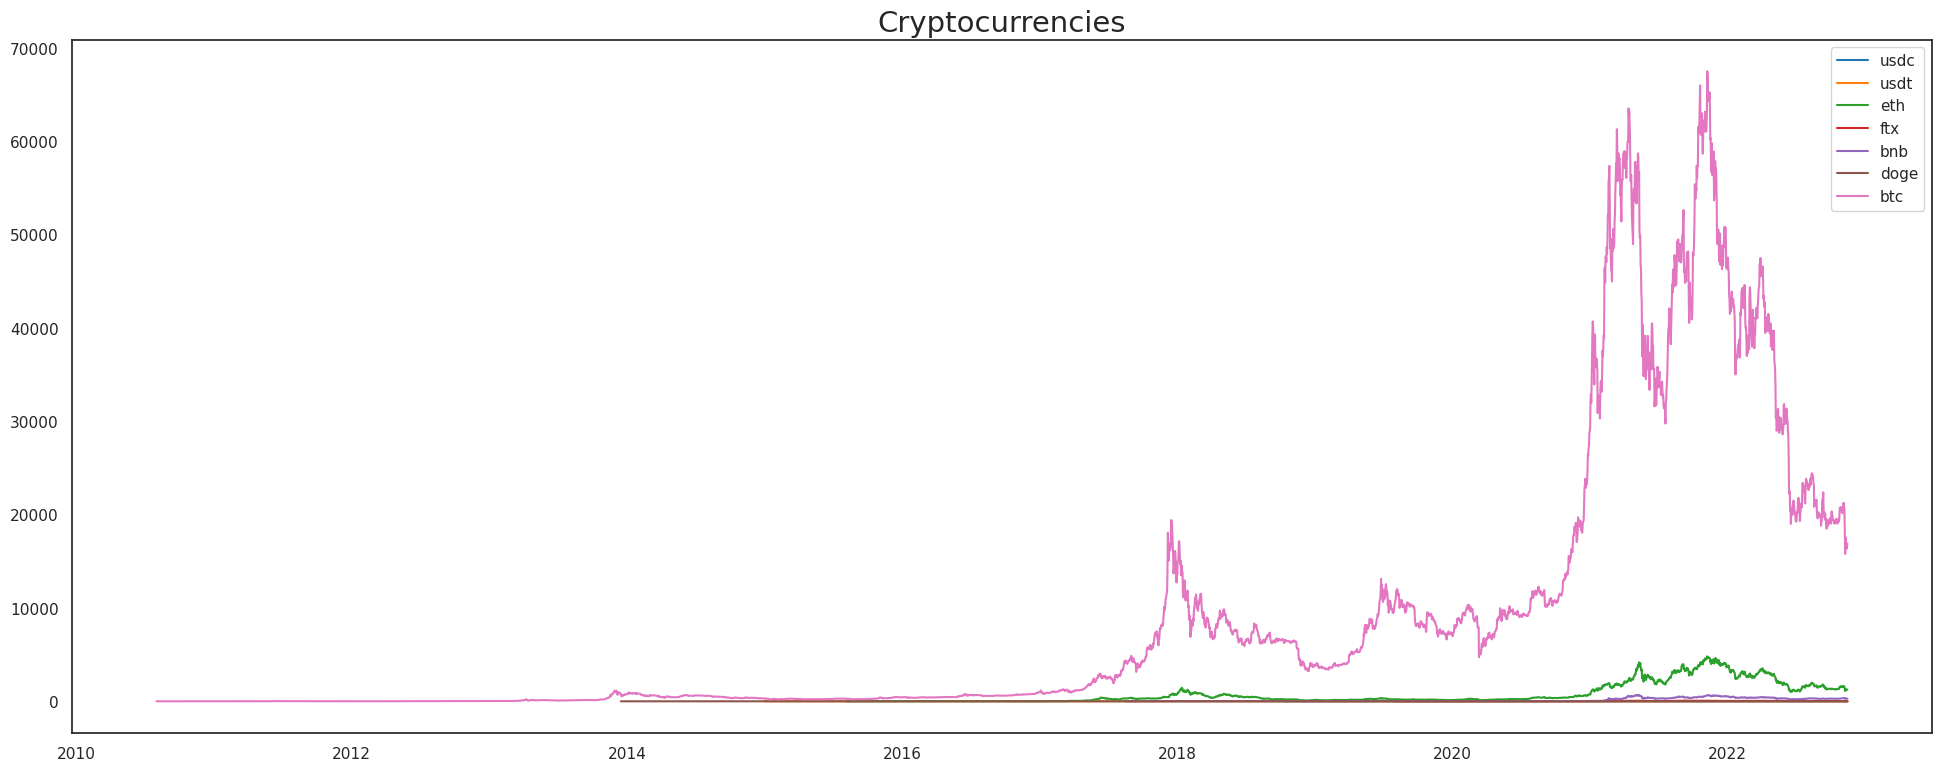

In [11]:
plt.figure(figsize=(24, 9))
for i in range(0, 7):
    plt.plot(coins.index, coins.iloc[:, i], label=coins.columns[i])

plt.title("Cryptocurrencies", fontsize=21)
plt.legend()
plt.show()

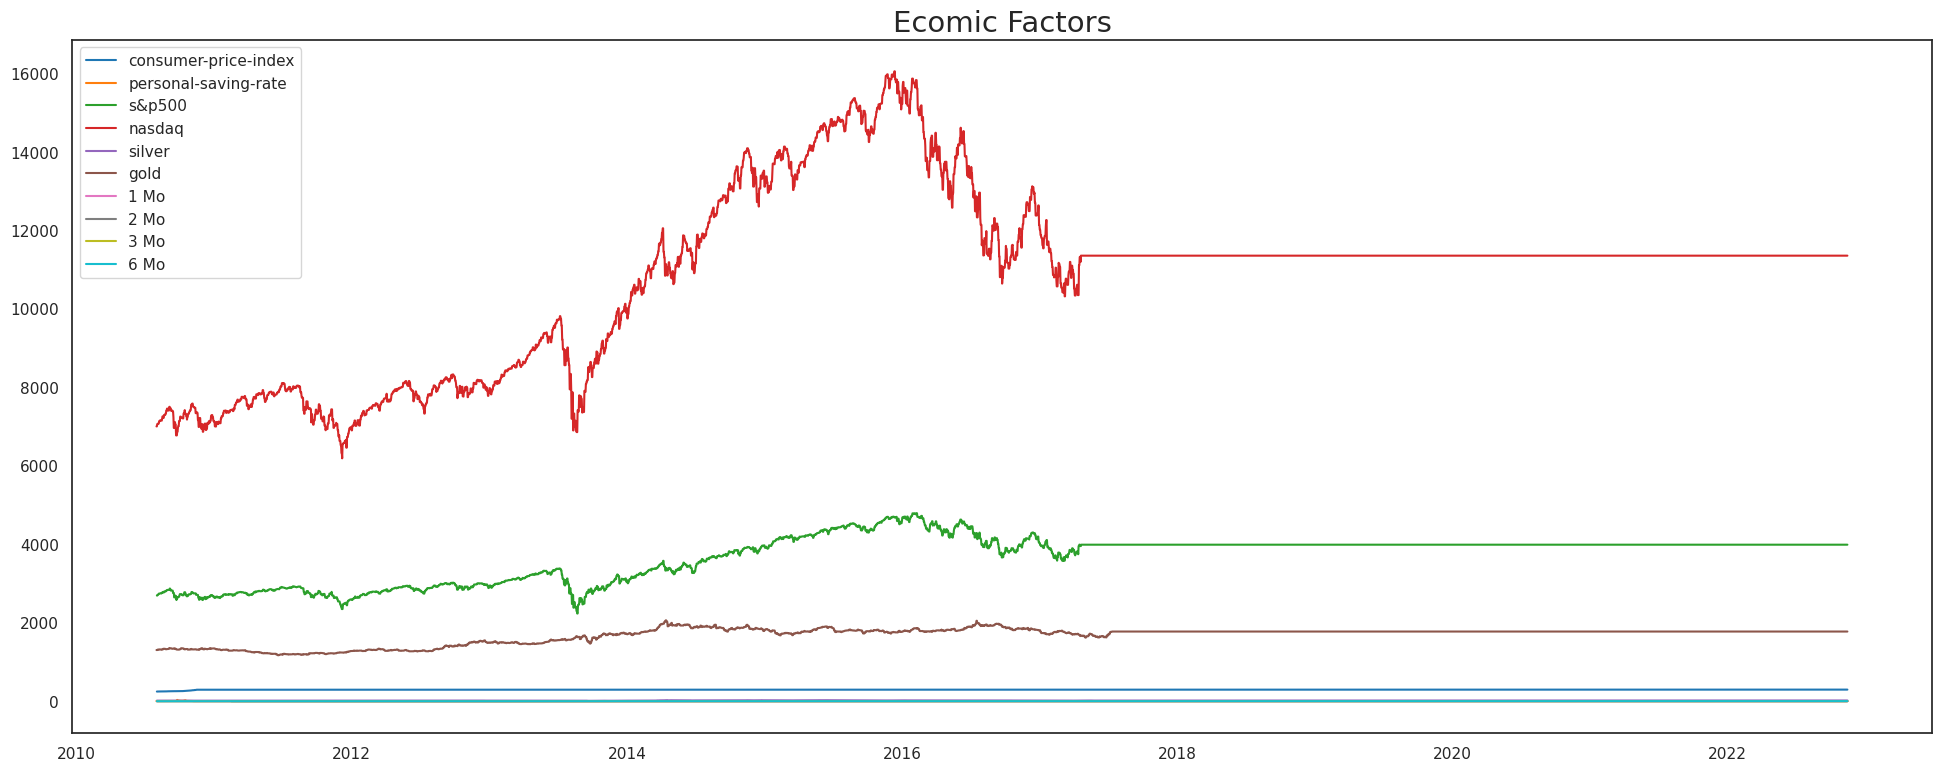

In [12]:
plt.figure(figsize=(24, 9))
for i in range(0, 10):
    plt.plot(factors.index, factors.iloc[:, i], label=factors.columns[i])

plt.title("Ecomic Factors", fontsize=21)
plt.legend()
plt.show()

In [14]:
result = []

# calculate the index value
for i in range(len(coins.columns)):
    coin = coins[coins.columns[i]] / len(coins.columns)
    result.append(coin)
# Concatenate the DataFrames in 'result'
ew_index = pd.DataFrame(1 + pd.DataFrame(pd.concat(result, axis=1)).sum(axis=1))

# Set the axis (column names) without using 'inplace'
ew_index = ew_index.set_axis([*ew_index.columns[:-1], "Index"], axis=1)

# Display the last 3 rows
print(ew_index.tail(3))

                  Index
Date                   
2022-11-13  2233.135291
2022-11-14  2270.497737
2022-11-15  2304.661041


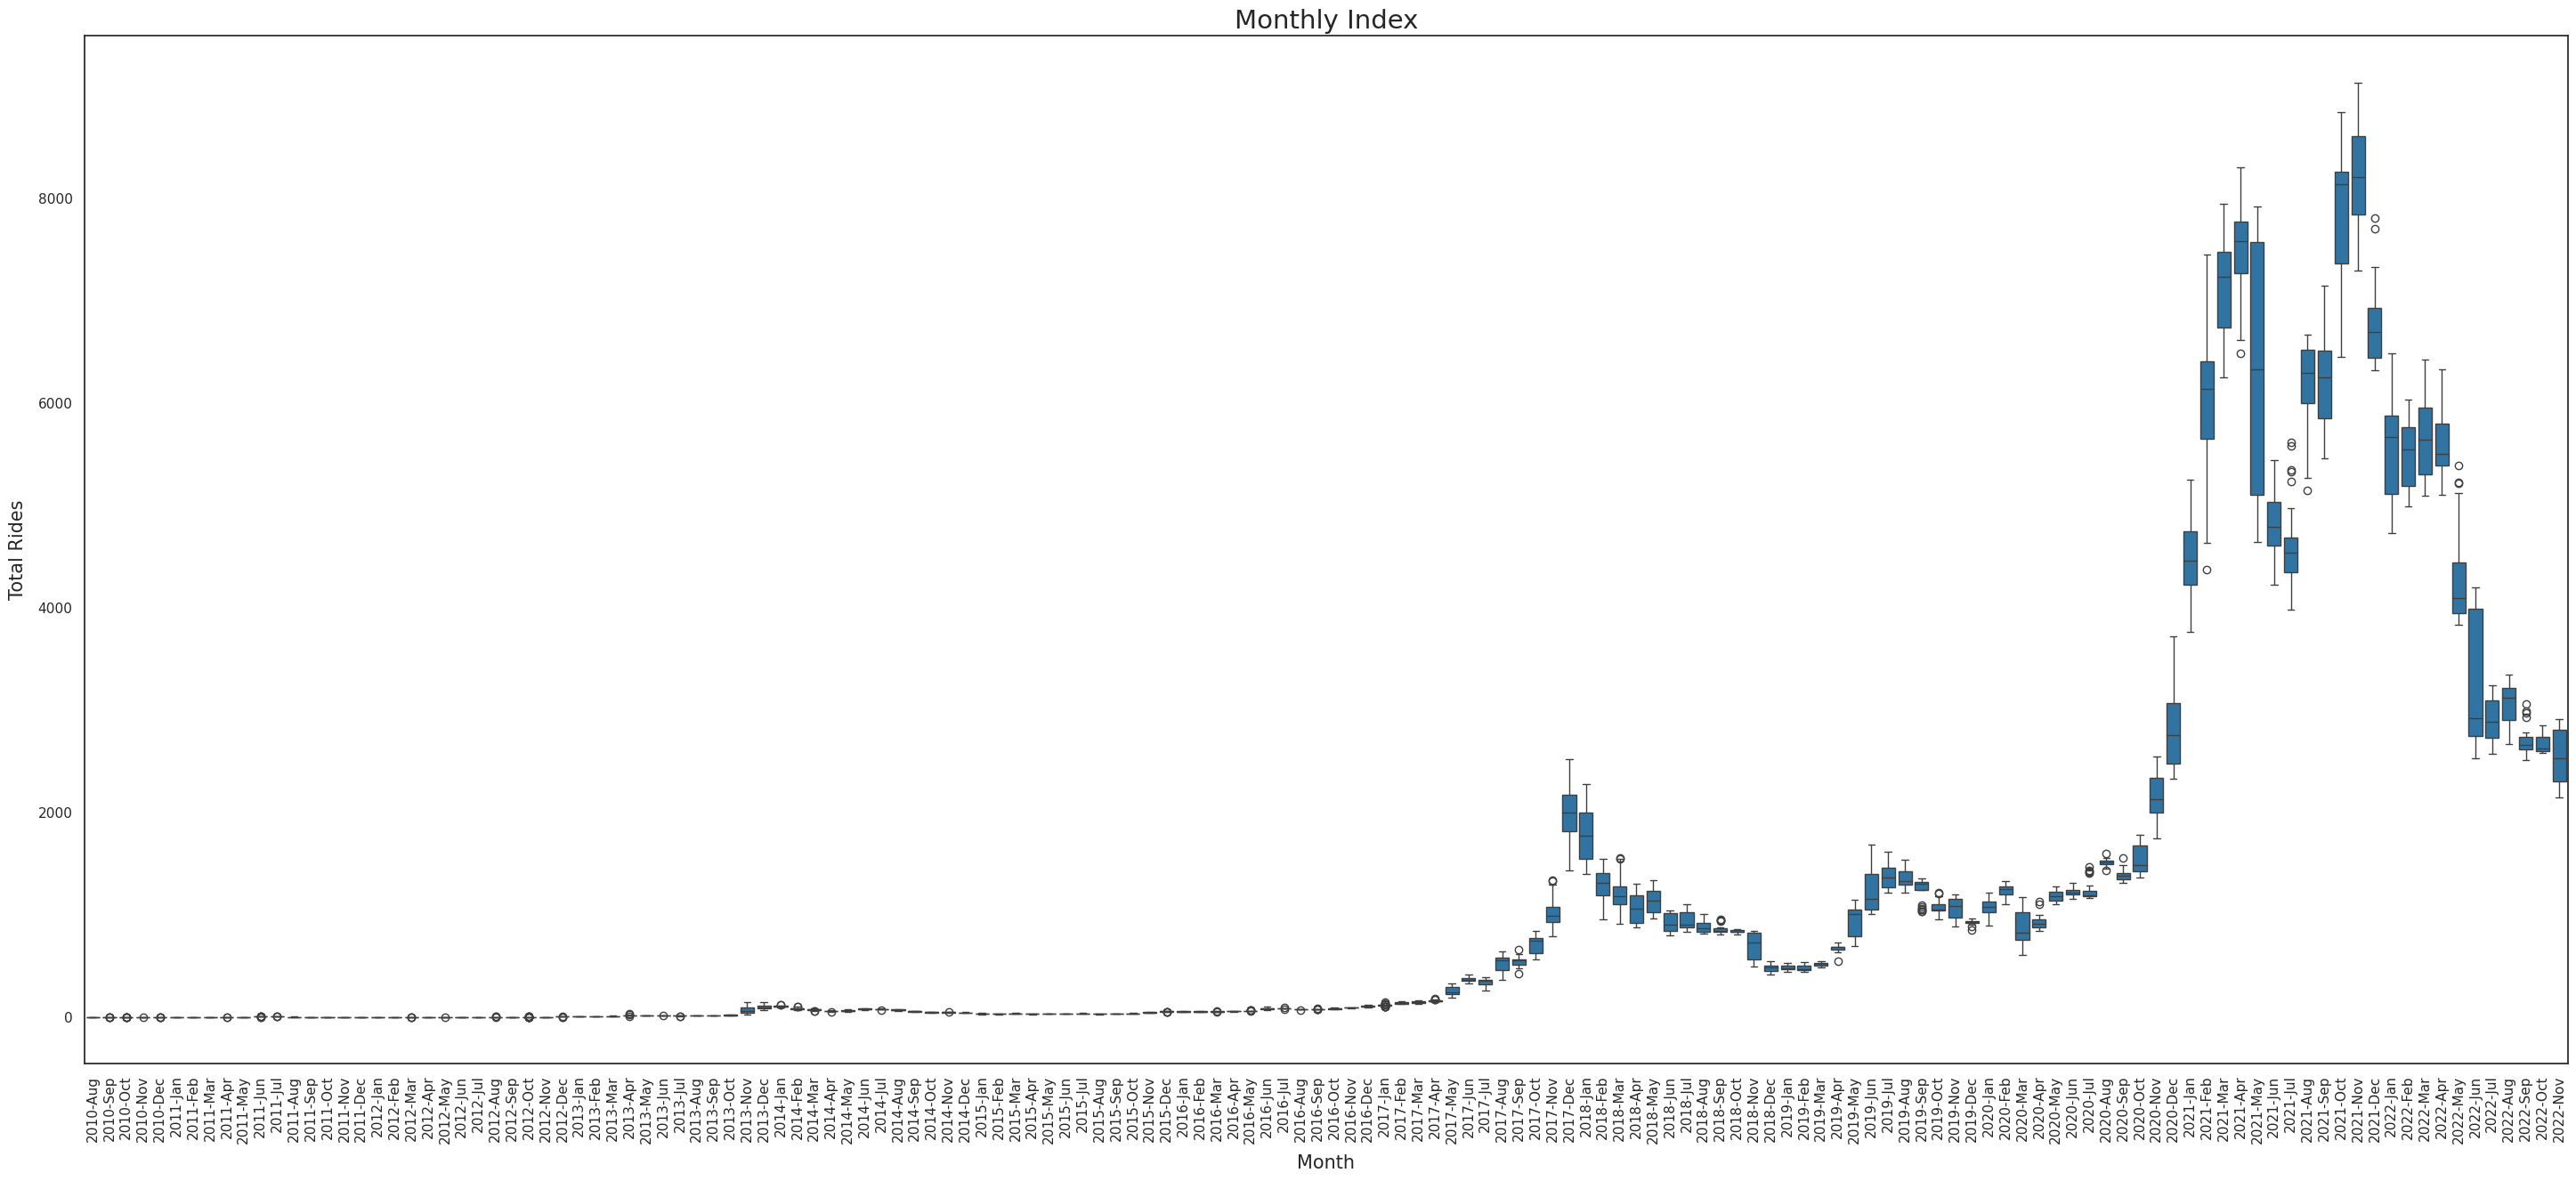

In [15]:
ts_fig, ts_ax = plt.subplots(figsize=(36, 15))
sns.boxplot(x=ew_index.index.strftime("%Y-%b"), y=ew_index.Index, ax=ts_ax)
ts_ax.set_xlabel("Month", labelpad=9, fontsize=15)
ts_ax.set_ylabel("Total Rides", labelpad=9, fontsize=15)
ticks = ew_index.index.strftime("%Y-%b").unique()  # Get unique month labels
ts_ax.set_xticks(range(len(ticks)))
ts_ax.set_xticklabels(ts_ax.get_xticklabels(), rotation=90)
ts_ax.set_title("Monthly Index", fontsize=21)
plt.show()






In [16]:
data = factors.merge(ew_index, how="left", left_on="Date", right_on="Date")

## Model

**Goal**: To build a model to predict the stock performance over a period of time frame based on their index values based on the given information

I have used the <a href="https://pypi.org/project/pmdarima/">Pmdarima</a> open source library for implementing the ARIMA and the SARIMAX models to predict the stocks performance.

This Kernal has been divided into 5 sections

    * Featuare Enginnering
    * Model building and metrics evalution.
    * Test data prepration.
    * Submission of final score

## Feature Engineering

**Normalizing** the data and using correlation to find out the most relevant features for the prediction using the Minmax Scaler to normlize the data. 
Now, let us combine the index values and predictor variables into one dataframe and use the function <code>prepare_data</code> to help us normalize the data and find the predictor variables that correlate with our index.


In [17]:
from sklearn.preprocessing import MinMaxScaler


# Create a copy of the dataset
df = data.copy()

# Normalize the data with Min-Max scaling
scaler = MinMaxScaler()
df_nor = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_nor['Date'] = df.index  # Assign the index as a new column
df_nor.set_index('Date', inplace=True)  # Set the 'Date' column as the index

**Calculating** of the **correlation** of the columns to select the highly correlated features for the prediction.

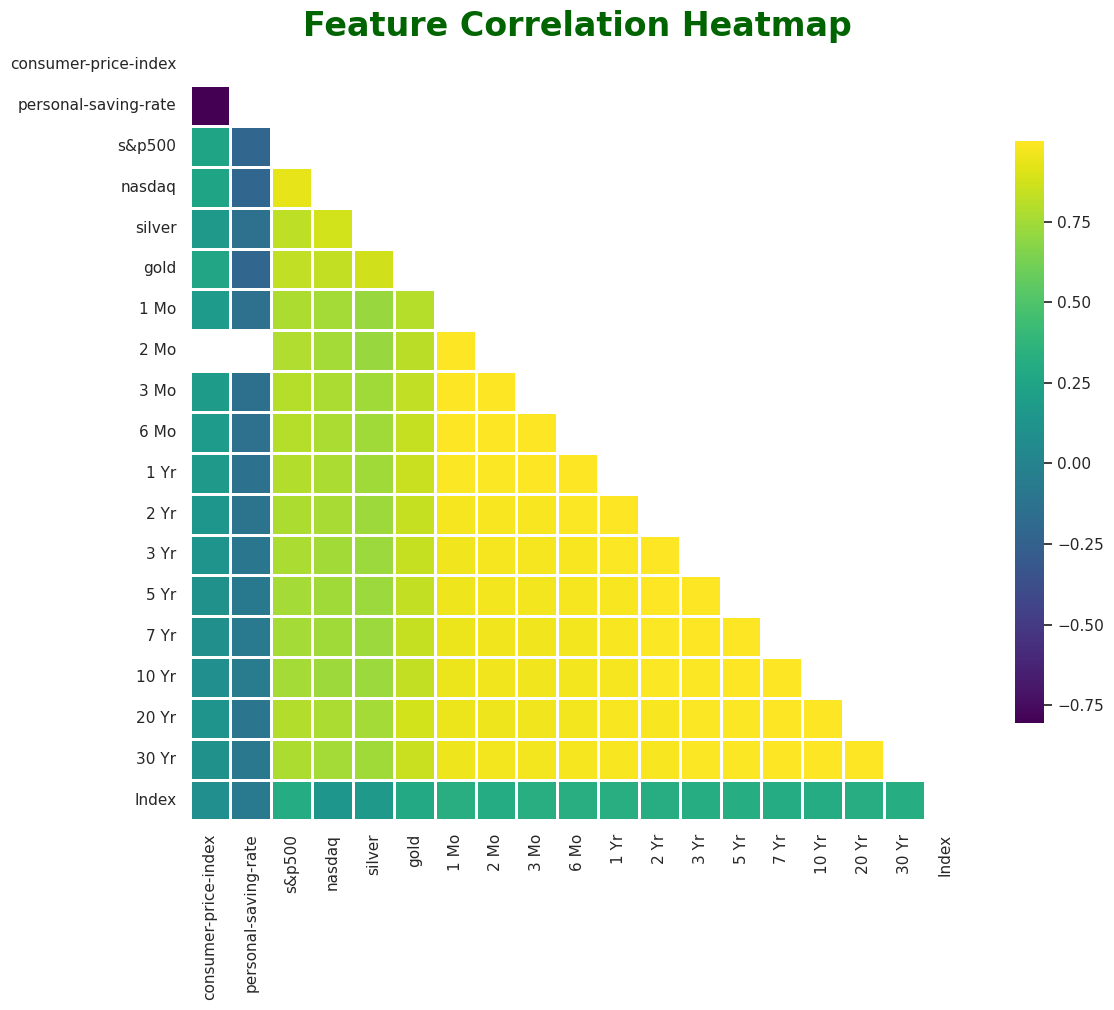

In [18]:
# Calculate the correlation matrix
cor = df_nor.corr(method="pearson")
mask = np.triu(np.ones_like(cor, dtype=bool))

#  Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))  # Set the figure size

# Use a different color palette (e.g., 'viridis' for a more modern look)
sns.heatmap(cor, 
            annot=False, 
            fmt=".2f", 
            cmap='viridis',  # Different color palette
            square=True, 
            cbar_kws={"shrink": .75},  # Adjust color bar size
            linewidths=1,  # Thicker lines between cells
            linecolor='white',  # Change line color for better contrast
            mask=mask)  # Custom annotation style

#  Set title and labels with enhanced aesthetics
plt.title("Feature Correlation Heatmap", fontsize=24, fontweight='bold', color='darkgreen')

#Add a grid for better readability
plt.grid(False)  # Disable the default grid

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title and labels
plt.show()

### Dropping the features that are not highly correlated which may cause noise in the data 

In [19]:
# Drop weakly correlated columns
weak_corr_cols = cor.columns[(cor.abs().max() >= -0.2) & (cor.abs().max() <= 0.2)]
df_nor.drop(weak_corr_cols, axis=1, inplace=True)

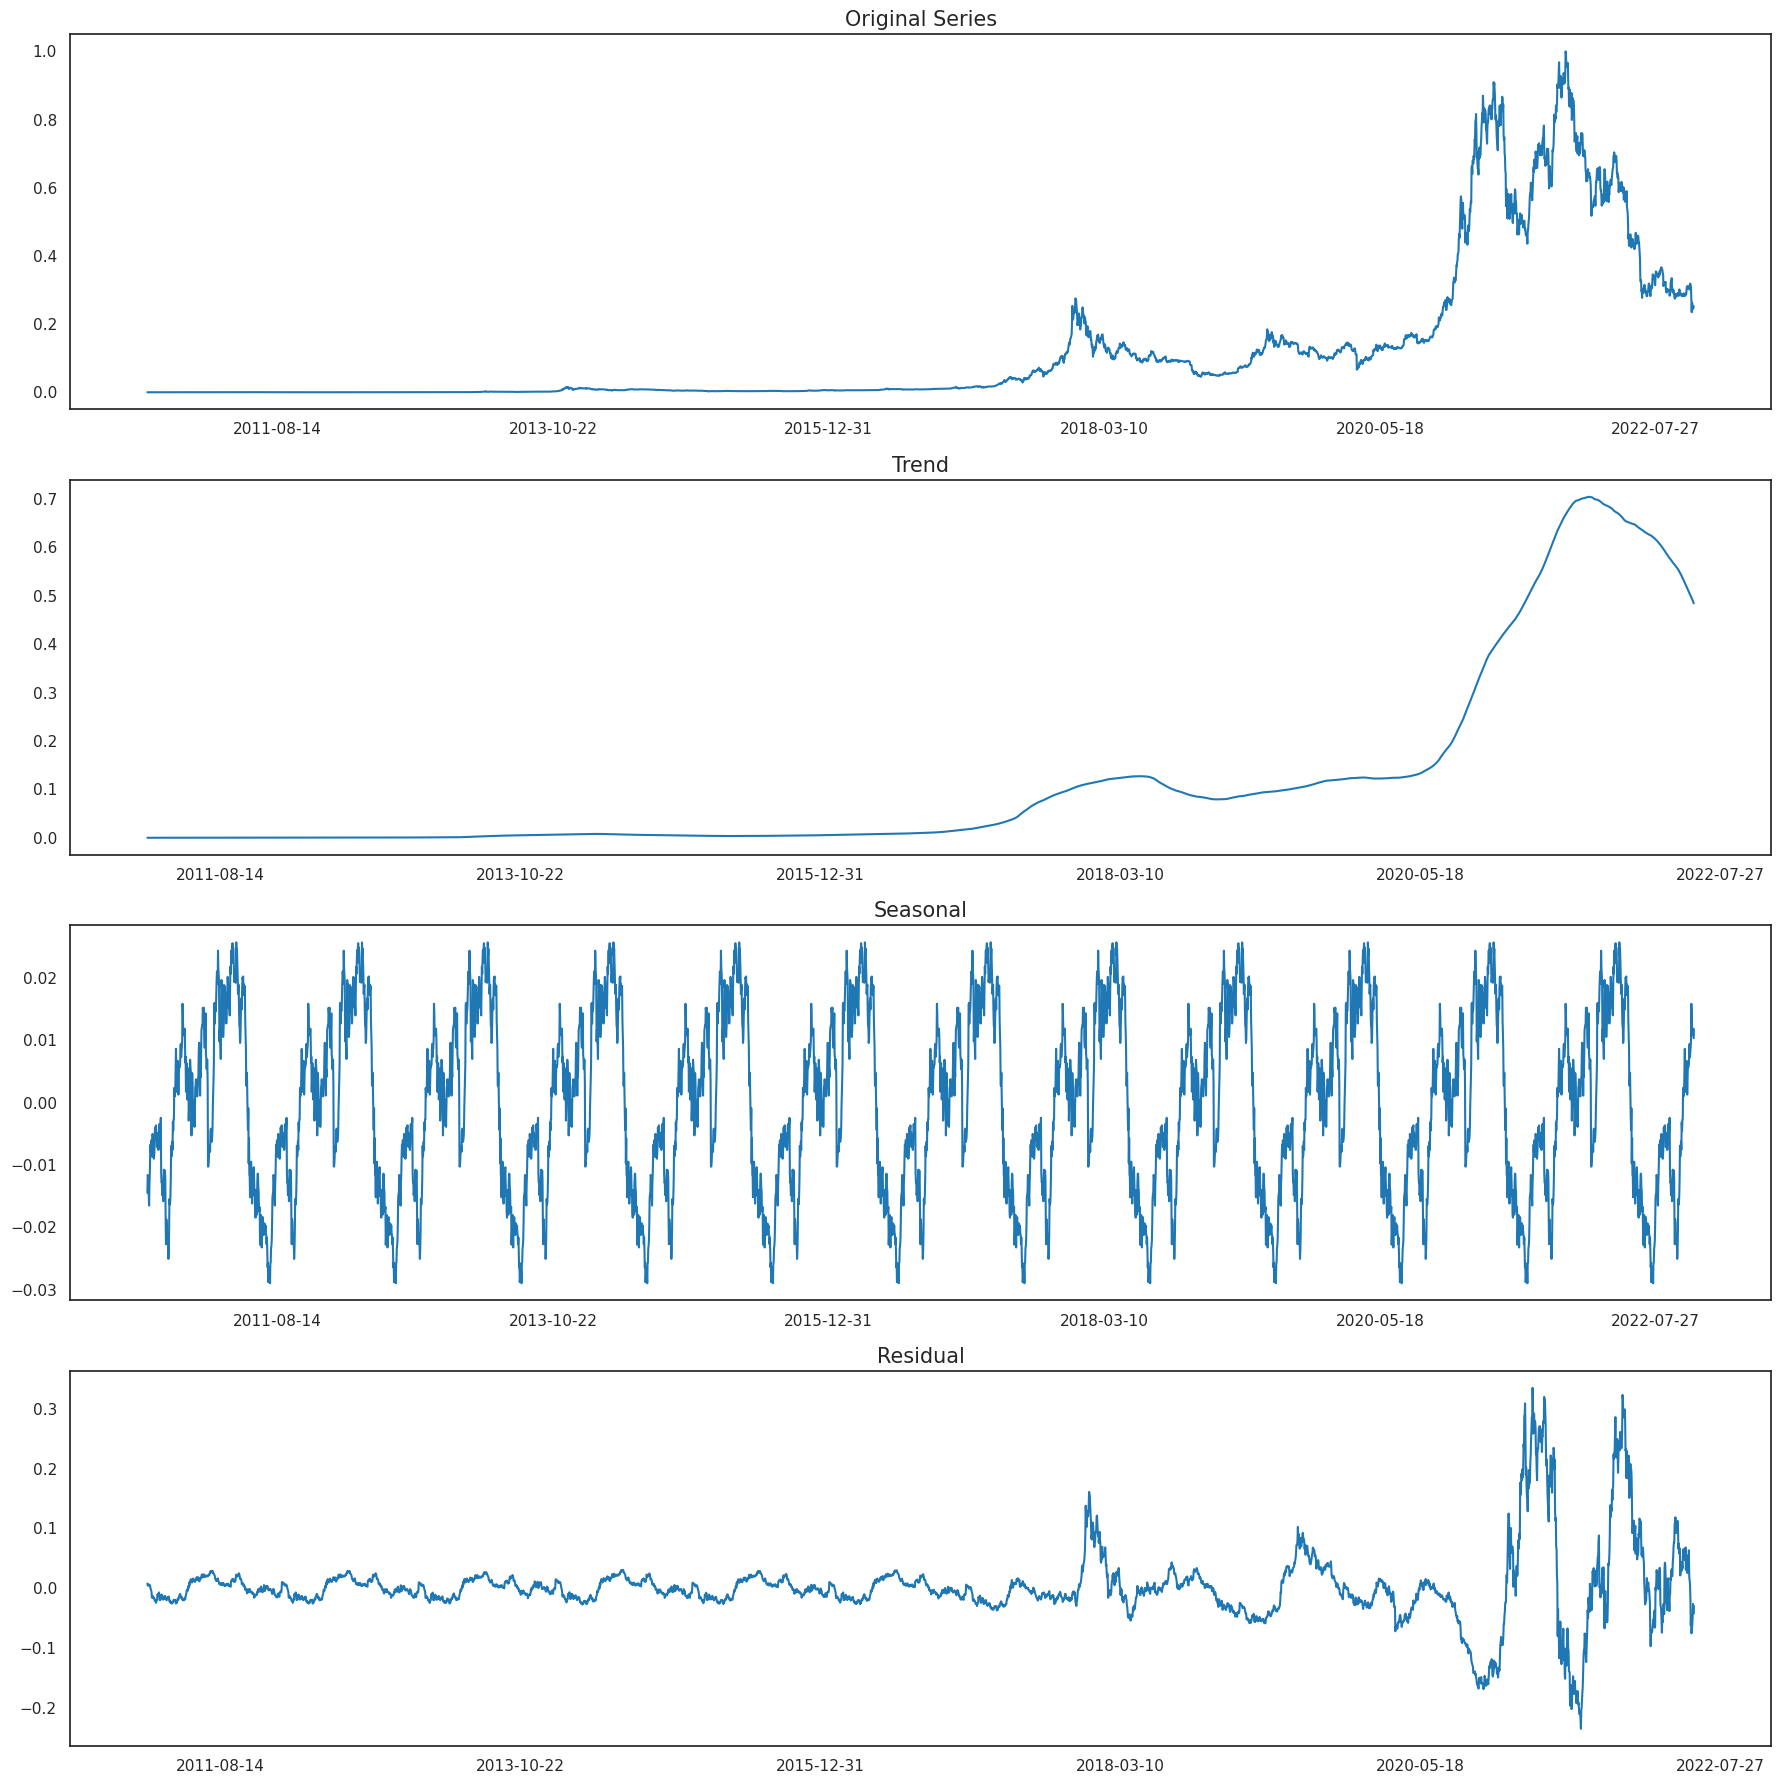

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose



# Set the time series data (assuming 'Value' is the column you want to decompose)
# Replace 'Value' with the actual name of the column you want to analyze
time_series_data = df_nor['Index']  # Use the appropriate column from your DataFrame

# Perform seasonal decomposition
# Set the period for decomposition (e.g., 365 for yearly seasonality)
period = 365
decomposition = seasonal_decompose(time_series_data, model="additive", period=period)

# Create subplots for the decomposition components
fig, axs = plt.subplots(4, 1, figsize=(18, 18))

# Original time series
axs[0].plot(decomposition.observed)
axs[0].set_title("Original Series", size=15)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(7))

# Trend
axs[1].plot(decomposition.trend)
axs[1].set_title("Trend", size=15)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(7))

# Seasonal
axs[2].plot(decomposition.seasonal)
axs[2].set_title("Seasonal", size=15)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(7))

# Residual
axs[3].plot(decomposition.resid)
axs[3].set_title("Residual", size=15)
axs[3].xaxis.set_major_locator(plt.MaxNLocator(7))

# Show the plots
plt.tight_layout()
plt.show()

In [21]:
df_nor.isna().sum()


consumer-price-index      1
personal-saving-rate      0
s&p500                    1
nasdaq                    0
silver                    1
gold                      0
1 Mo                      1
2 Mo                    199
3 Mo                      1
6 Mo                      1
1 Yr                      1
2 Yr                      1
3 Yr                      1
5 Yr                      1
7 Yr                      1
10 Yr                     1
20 Yr                     1
30 Yr                     1
Index                     0
dtype: int64

## Test data prepration



In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


columns_to_replace = ['1 Mo', '2 Mo','3 Mo','6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']

# Replace missing values with mode for specified columns
for column in columns_to_replace:
    mode_value = df_nor[column].mode()[0]  # Get the mode (most frequent value)
    df_nor[column].fillna(mode_value) 
df_nor.dropna(inplace=True)

train_percent = 0.9505

# Calculate the number of records for training
train_size = int(len(df_nor) * train_percent)

# Split the data into training and testing sets
X_train = df_nor.iloc[:train_size, :-1]  # Features for training
X_test = df_nor.iloc[train_size:, :-1]    # Features for testing
y_train = df_nor.iloc[:train_size, -1]    # Target for training
y_test = df_nor.iloc[train_size:, -1] 


In [23]:
X_train.isna().sum()

consumer-price-index    0
personal-saving-rate    0
s&p500                  0
nasdaq                  0
silver                  0
gold                    0
1 Mo                    0
2 Mo                    0
3 Mo                    0
6 Mo                    0
1 Yr                    0
2 Yr                    0
3 Yr                    0
5 Yr                    0
7 Yr                    0
10 Yr                   0
20 Yr                   0
30 Yr                   0
dtype: int64

## Model building and metrics evaluation


## ARIMA model

To find out the best parameters that suit our model. In this step, I am using one of the most powerful tools called `auto_arima` to find the p and q. There is noneed to find d through this tool because we can use the stationary test to easily identify the order of differencing.

In [42]:
arima_param = auto_arima(y_train, start_p=1, d=1, start_q=1, max_p=5, max_q=5, trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-26362.506, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26363.811, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-26364.323, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-26364.379, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-26364.836, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.710 seconds


Based on the result, it was found that the best parameters for ARIMA models are when `p` and `q` equal 0. Then we can put these parameters into the model and start to train our model. In this stage, I am putting the training dataset into the `ARIMA` and the parameters obtained from `auto_arima` into `order`.

In [43]:
algorithm = ARIMA(y_train, order=arima_param.get_params()["order"])
model = algorithm.fit()

Here setting `steps` parameter as the length of the testing data. Then  checkingi the error rate of the model to ensure the model's performance.


In [44]:
forecast = model.get_forecast(steps=len(y_test))
prediction = forecast.predicted_mean
ci = forecast.conf_int()

# check error rate
mse = root_mean_squared_error(y_test, prediction)
rmse = root_mean_squared_error(y_test, prediction)
print("The error rates of the ARIMA forecasting are: \nMSE = %f \nRMSE = %f" %(mse, rmse))

The error rates of the ARIMA forecasting are: 
MSE = 0.262045 
RMSE = 0.262045


In [45]:
model_dir = "./model_bin"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model_file = "./model_bin/model_arima.pkl"
with open(model_file, "wb") as f:
    pickle.dump(model, f)

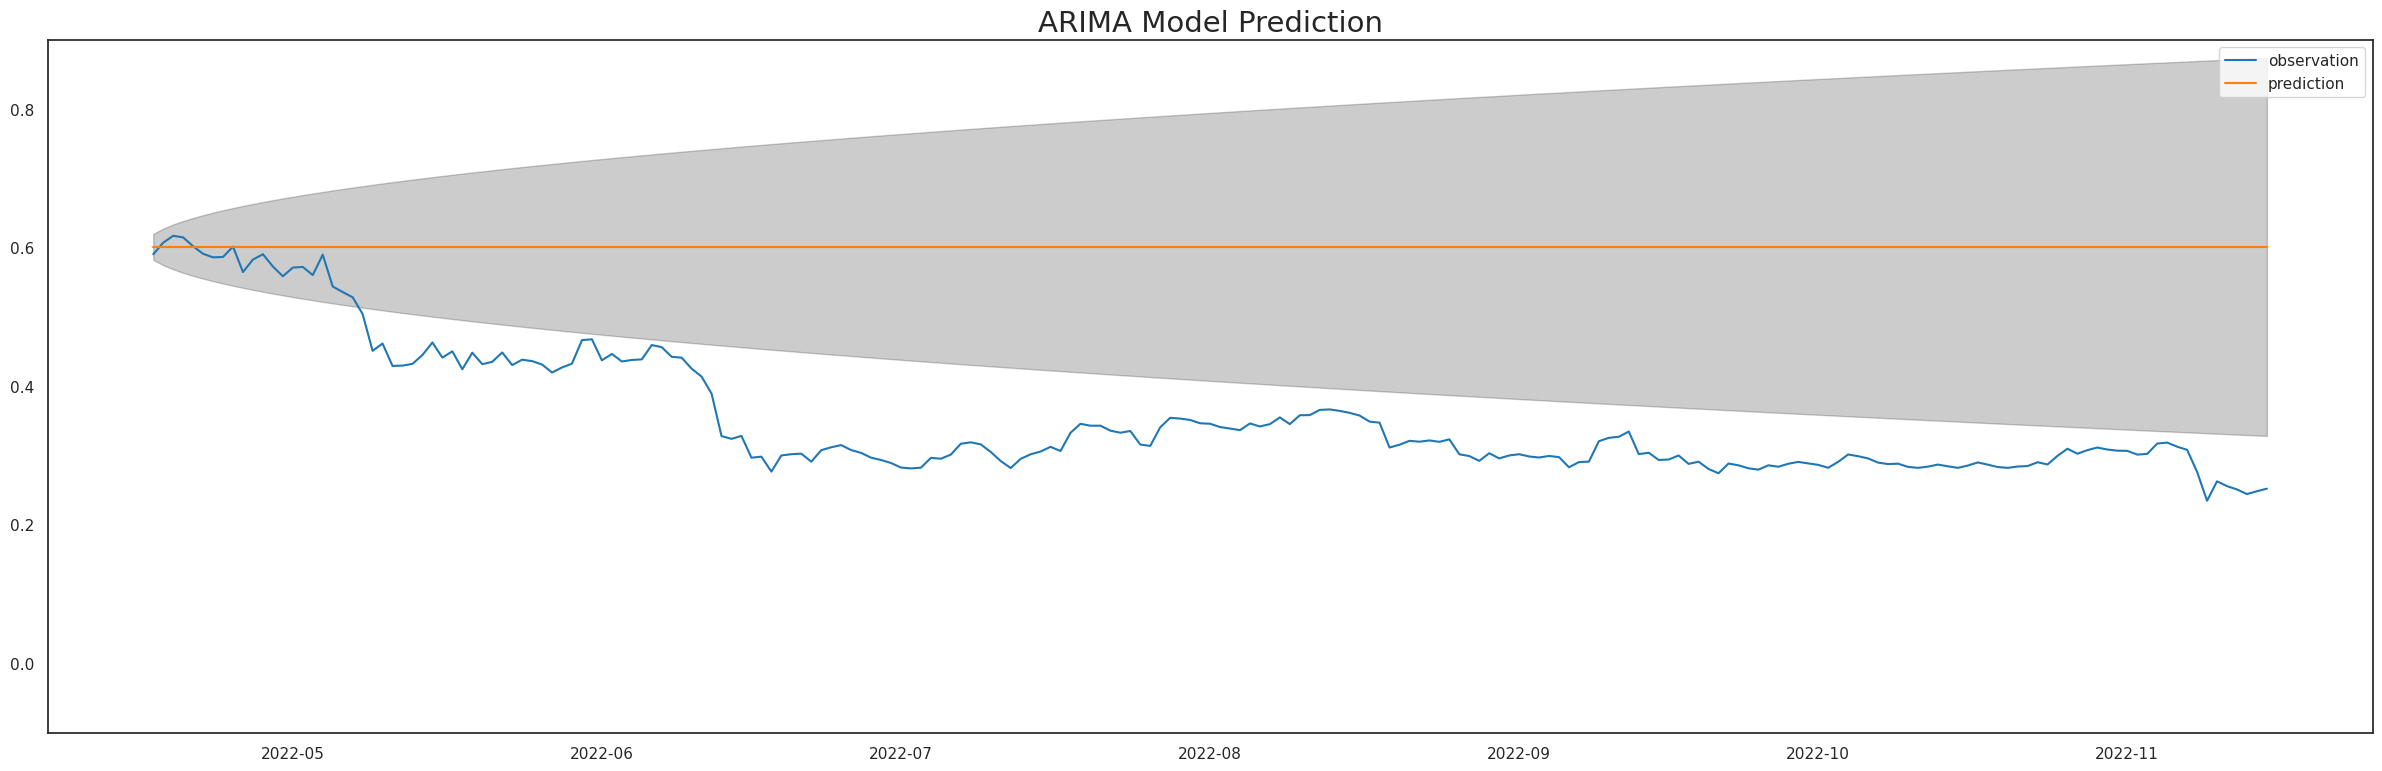

In [46]:
plt.figure(figsize=(30, 9))
plt.plot(y_test.index, y_test, label="observation")
plt.plot(prediction.index, prediction, label="prediction")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="k", alpha=0.2)
plt.ylim([-0.1, 0.9])
plt.title("ARIMA Model Prediction", fontsize=21)
plt.legend()
plt.show()

## SARIMAX model

In [47]:
sarimax_param = auto_arima(y_train, exogenous=X_train, m=7, start_p=0, d=1, start_q=0, start_P=0, D=1, start_Q=0, max_p=3, max_q=1, max_P=3, max_Q=1, trace=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-23305.977, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-24612.717, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=3.84 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-23307.489, Time=0.34 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-25095.163, Time=1.60 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=-25464.837, Time=2.05 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=6.20 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=5.72 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=-25462.307, Time=1.51 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=-25463.018, Time=3.59 sec
 ARIMA(1,1,1)(3,1,0)[7]             : AIC=inf, Time=6.25 sec
 ARIMA(0,1,1)(3,1,0)[7]             : AIC=-25464.932, Time=2.00 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=-25094.875, Time=1.31 sec
 ARIMA(0,1,1)(3,1,1)[7]             : AIC=inf, Time=6.31 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AI

In [48]:


# Fit the SARIMAX model
algorithm = SARIMAX(endog=y_train, exog=X_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
model = algorithm.fit(disp=False, maxiter=1000, method='lbfgs')

# Print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                 4078
Model:               SARIMAX(1, 0, 0)   Log Likelihood               13157.349
Date:                Wed, 24 Jul 2024   AIC                         -26274.697
Time:                        08:58:07   BIC                         -26148.430
Sample:                    02-16-2011   HQIC                        -26229.983
                         - 04-16-2022                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
consumer-price-index     0.1134      0.157      0.720      0.472      -0.195       0.422
personal-saving-rate     0.0004      0.001      0.721      0.471      -0.001       0.001
s&p500      

In [49]:
model_file = os.path.join(model_dir, "model_sarimax.pkl")
with open(model_file, "wb") as f:
    pickle.dump(model, f)

In [50]:
# forecast the data
forecast = model.get_prediction(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, dynamic=True)
prediction = forecast.predicted_mean
ci = forecast.conf_int()

# check error rate
mse = root_mean_squared_error(y_test, prediction)
rmse = root_mean_squared_error(y_test, prediction)
print("The error rates of the SARIMAX forecasting are: \nMSE = %f \nRMSE = %f" %(mse, rmse))

The error rates of the SARIMAX forecasting are: 
MSE = 0.088675 
RMSE = 0.088675


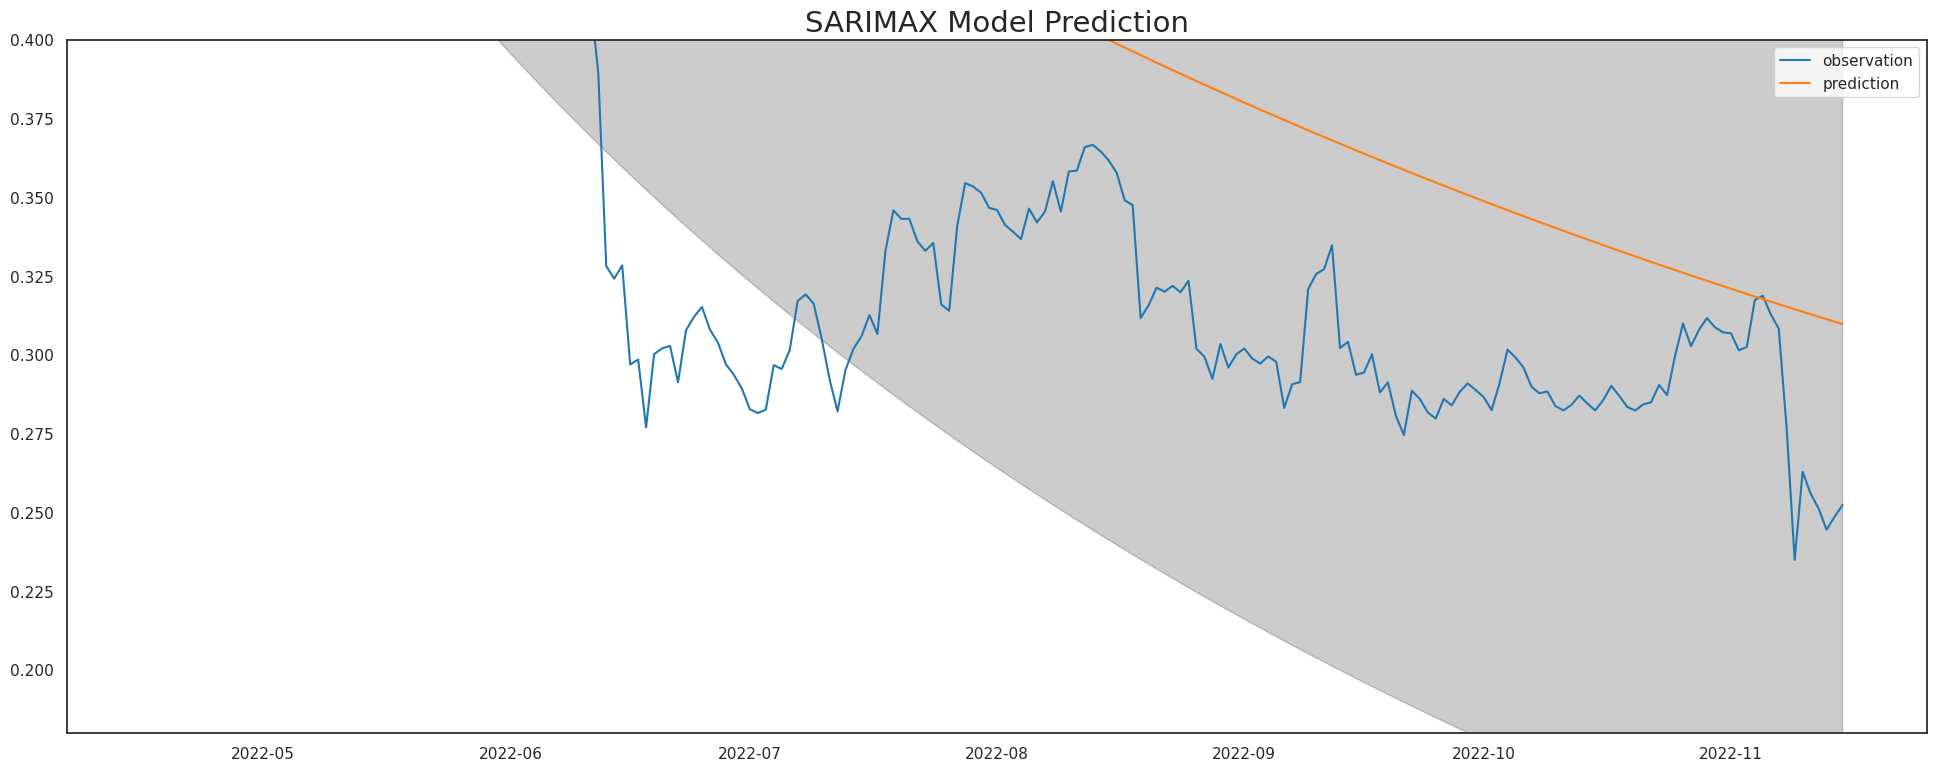

In [51]:
plt.figure(figsize=(24, 9))
plt.plot(y_test.index, y_test, label="observation")
plt.plot(prediction.index, prediction, label="prediction")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="k", alpha=0.2)
plt.ylim([0.18, 0.40])
plt.title("SARIMAX Model Prediction", fontsize=21)
plt.legend()
plt.show()